# HIV Model
Duncan Mazza

In [123]:
# Configure Jupyter so figures appear in the notebook
%matplotlib inline

# Configure Jupyter to display the assigned value after an assignment
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'

# import functions from the modsim.py module
from modsim import *

from pandas import read_html

In [124]:
Γ = 1.36
τ = 0.2 
μ = 1.36e-3
β = 0.00027
ρ = 0.1
α = 3.6e-2
π = 100
σ = 2
δ = 0.33
dt = 0.01

system = System(t0=t0, t_end=t_end,
                  Γ = Γ, τ = τ, μ = μ, β = β, 
                  ρ = ρ, α = α, π = π, σ = σ,
                  δ = δ, dt = dt)

init = State(R = 200, L = 0, E = 0, V = 4e-7)

system

,values
t0,0.00000
t_end,120.00000
Γ,1.36000
τ,0.20000
μ,0.00136
β,0.00027
ρ,0.10000
α,0.03600
π,100.00000
σ,2.00000


In [129]:
def update_func(state, t, system):
    
    unpack(system)
    
    """
    Update the SIR model.
    
    state: State (R, L, E, V)
    t: time
    system: System object
    
    returns: State
    """
    r, l, e, v = state
    
    # flows:
    sink_to_r =   Γ * τ 
    r_to_sink =   μ * r
    r_to_l =      β * ρ * r * v
    r_to_e =      (1 - ρ) * β * r * v
    l_to_sink =   μ * l
    l_to_e =      α * l
    e_to_sink =   δ * e
    sink_to_v =   π * e
    v_to_sink =   σ * v
    
    drdt = sink_to_r - r_to_sink - r_to_l - r_to_e
    dldt = r_to_l - l_to_sink - l_to_e
    dedt = l_to_e + r_to_e - e_to_sink
    dvdt = sink_to_v - v_to_sink
    
    # dt is the time step - it is defined in system; stocks:
    r += drdt * dt 
    l += dldt * dt
    e += dedt * dt
    v += dvdt * dt
    
    return State(R=r, L=l, E=e, V=v)

In [140]:
update = update_func(init, 1, system)
update2 = update_func(update, 1, system)

,values
R,2.000000e+02
L,4.275993e-11
E,3.842783e-10
V,3.843544e-07


In [141]:
t0 = 0
system.t_end = 12000

def run_simulation(system, update_func):
    """Runs a simulation of the system.
        
    system: System object
    update_func: function that updates state
    
    returns: TimeFrame
    """
    unpack(system)
    
    frame = TimeFrame(columns=init.index)
    frame.row[t0] = init
    
    for t in linrange(t0, t_end):
        frame.row[t+1] = update_func(frame.row[t], t, system)
    
    return frame

In [150]:
def plot_results(R, L, E, V):
    
    plot(R, '--', label='R (Uninfected CD4 Lymphocytes)')
    plot(L, '-', label='L (Latently Infected Cells)')
    plot(E, ':', label='E (Actively Infected Cells)')
    #plot(V, '*', label='V')


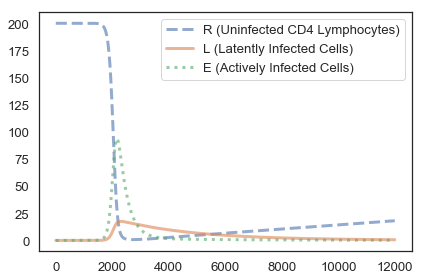

In [151]:
# defining global variables


# making the system
# system = make_system(Γ, τ, μ, β, ρ, α, π, σ, δ)



output = run_simulation(system, update_func)

#plot(output['L'])
#plot(output['R'])
#plot(output['V'])
#plot(output['E'])
#decorate(legend = True)

plot_results(output.R, output.L, output.E, output.V)
decorate(legend = True)

In [ ]:
#although this doesn't look quite like the graphs in the paper, it is because different scales are used to represent what is effectively the same data.